<a href="https://colab.research.google.com/github/Bibi852/jhu-ml/blob/main/M034_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 - MLMA

---

Abigail Lee

Machine Learning and Applications

## 1. Exercise 1 - Explaining some ML basics to your boss

Dear Supervisor,

I hope this email finds you well. I appreciate the opportunity to answer any questions you may have about machine learning (ML) methods and applications.

I completely understand any confusion regarding the distinctions between artificial intelligence (AI), machine learning (ML), and statistical learning, as these terms are often used interchangeably in popular culture and mainstream media. In reality, AI and ML are largely marketing terms for statistical learning, which is simply a tool for understanding and analyzing data. If I were to differentiate them, I would say that AI is the broadest category, encompassing any technique that enables computers to mimic human intelligence. ML is a subset of AI that focuses on algorithms allowing computers to learn from data without explicit programming. Statistical learning, the most specific of the three, is centered on developing, analyzing, and interpreting statistical models used for predictions and classifications. However, in practice, the distinctions between these terms are quite blurred, so I wouldn’t be too concerned with their precise definitions.

Another term that often causes confusion is “fitting” a model, which essentially refers to estimating the relationship between predictor and outcome variables by adjusting model parameters based on a given dataset. The goal is to minimize the difference between predicted and actual outcomes.

I appreciate your mention of ordinary least squares (OLS) and logistic regression, as they are two commonly used parametric models—meaning they assume a specific functional relationship between variables. When applied to data, OLS is used to predict continuous outcomes, while logistic regression is suited for categorical classifications. The key distinction between these models lies in their output: OLS regression estimates variations in a continuous outcome based on predictor variables, whereas logistic regression provides probability-based classifications. For example, if you were predicting whether a customer is likely to return an order (a binary outcome), logistic regression would be appropriate. On the other hand, if you wanted to predict median home values in a neighborhood, linear regression (OLS) would be the better choice.

While some degree of error is inevitable due to random noise in data, two major sources of reducible error in model estimation are bias and variance. The appropriate metric for measuring accuracy depends on the type of model being used. For an OLS model, common accuracy measures include mean squared error (MSE) and R-squared, which quantifies the proportion of variance in the outcome explained by the predictors. In contrast, the accuracy of logistic regression is often assessed using a confusion matrix, which provides insights into false positives, false negatives, and overall classification accuracy. Depending on the application, certain types of errors (e.g., false positives vs. false negatives) may be more significant—for instance, in medical testing, where sensitivity and specificity play crucial roles in diagnosing a condition.

Beyond accuracy, model generalizability is a critical consideration in ML. A model’s consistency on new, unseen data is referred to as variance, and balancing bias and variance is known as the bias-variance tradeoff. Highly accurate models that perfectly capture the training data often struggle when applied to new datasets, a phenomenon known as overfitting. This occurs when the model picks up on noise or patterns unique to the training data that do not generalize to the broader population. Therefore, the goal is to develop a model that not only fits the training data well but also performs reliably on new observations.

In real-world applications, we must also consider a tradeoff between model accuracy and interpretability. Non-parametric models such as splines can capture intricate details of the predictor-outcome relationship but are significantly more complex to interpret than OLS or logistic regression. Moreover, while including every available variable in a model might improve accuracy, it often reduces interpretability, making it difficult to extract meaningful insights.

Applying all these ML concepts to your example regarding student graduation prediction, I would recommend logistic regression over OLS regression for this task given the binary nature of the graduation outcome as well as the focus on probability. However, using all available variables would likely result in an overfitted model that does not generalize well to new student data. Looking further into your dataset before fitting a model will help identify the most meaningful predictors for a final model that is both highly accurate and generalizable to new information. This is accomplished through testing for correlation and multicollinearity in the dataset as well as through methods of stepwise selection, which includes both forward and backwards selection. This strategy iterates through all potential predictor variables, either adding or eliminating coefficients as fit to reach an optimal subset of variables that are the most significant in predicting graduation outcomes.

I hope this explanation provides clarity on your questions regarding ML methods and terminology. I truly appreciate the opportunity to discuss these fascinating topics with you. Please feel free to reach out if you have any further questions.

Best regards,

 Abigail Lee

 Office of Institutional Research



---



## Exercise 2 - Applied OLS

This problem involves the Boston data set, which is used in the lab for this chapter. We will
now try to predict pupil-teacher ratio using other variables in this data set. In other words,
pupil-teacher ratio is the response, and the other variables are the predictors.


#### **Variable Definitions for Boston Dataset**
`crim`: per capita crime rate by town.

`zn:` proportion of residential land zoned for lots over 25,000 sq.ft.

`indus`: proportion of non-retail business acres per town.

`chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

`nox`: nitrogen oxides concentration (parts per 10 million). Changed to percentage for easier interpretation.

`rm`: average number of rooms per dwelling.

`age`: proportion of owner-occupied units built prior to 1940.

`dis`: weighted mean of distances to five Boston employment centres.

`rad`: index of accessibility to radial highways.

`tax`: full-value property-tax rate per $10,000.

`ptratio`: pupil-teacher ratio by town.

`lstat`: lower status of the population (percent).

`medv`: median value of owner-occupied homes in $1000s.

### **Part 1: Accuracy/Model Fit of Predictors**

Of the variables in the dataset, which of them (if any) are “good” predictors of pupil-teacher
ratio? Explain your conclusion, using measures of accuracy/model fit that are discussed in
Chapter 3.

#### Import Packages and Data

In [2]:
pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 879.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00

In [3]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [4]:
# importing Boston dataset from ISLP
Boston = load_data("Boston")
#inspecting columns
Boston.columns
Boston['nox'] = Boston['nox'] * 100

#### Goodness of Fit Measures

There are 12 variables available that can be used to predict pupil-teacher ratio values. While we could simply plug all of these variables as coefficients into one overarching OLS model, it is likely the case that not all variables have the same contributions to explaining variation in the outcome `ptratio`, so an important task in a machine learning project is to identify the most meaningful predictors to explore further when fitting and refining models.

An optimal subset of predictors is essential for a model that is both highly accurate to the predictor-outcome relationship and generalizable to new data (cite here). There are several strategies available to evaluate the quality and contributions of model predictors to explaining outcomes in `ptratio`.

Variance inflation factors (VIF) help assess for multicollinearity between predictor variables. The presence of multicollinearity, represented by a high VIF score, may present a problem as the contributions of one variable are not easily distinguished from that of others. Removing or combining problematic variables is thus a simple and direct way to improve model performance.

Wrapper methods, including forward and backward selection, iterate through the set of all possible predictors to select a subset of predictors that have the greatest contributions to a model's predictive accuracy and power (cite here). Forward selection starts with a null model and adds the most significant coefficient one at a time based on measures of accuracy and goodness of fit (e.g. residual sum of squares (RSS), p-values) until some stopping rule is satisfied. Backward selection starts with all variables included in the model and at each step, removes the variable with the largest p-value until all remaining coefficients have a p-value below a specified threshold (cite ISLP).

These methods, in addition to critical and contextual evaluation of variables in the dataset, help identify predictors with the most potential to explain variation in `ptratio` when fit in simple or multiple linear regression models.

#### VIF

In [5]:
# VIF to measure multicollinearity
# code from ISLP Chapter 3 lab
terms = Boston.columns.drop('ptratio')
X = MS(terms).fit_transform(Boston)
y = Boston['ptratio']
vals = []
for i in range(1, X.values.shape[1]):
  vals.append(VIF(X.values, i))
vif = pd.DataFrame({'vif':vals},
                   index = X.columns[1:])
vif
# the VIF of 'tax' and 'rad' variables are rather high


,vif
crim,1.806241
zn,2.208327
indus,3.924465
chas,1.092338
nox,3.934455
rm,2.203872
age,3.068713
dis,4.391849
rad,7.307930
tax,9.199634


The variables `rad` and `tax` have VIF scores over 5 and are potentially problematic signs of multicollinearity. Because neither of these variables have VIF scores over 10, they will not be removed from the analysis but do present concerns when interpreting model results.

In [21]:
#VIF without these two variables is improved
X1 = X.drop(['tax', 'rad'], axis = 1)
vals = []
for i in range(1, X1.values.shape[1]):
  vals.append(VIF(X1.values, i))
vif = pd.DataFrame({'vif':vals},
                   index = X1.columns[1:])
vif

,vif
crim,1.408693
zn,2.079238
indus,2.999138
chas,1.080492
nox,3.701394
rm,2.172916
age,3.051265
dis,4.381581
lstat,3.486147
medv,3.323078


#### Stepwise Selection

##### Forward Selection

In [6]:
def forward_select(X, y):

  #start with null model only containing intercept
  null_df = X['intercept'].to_frame()
  final_df1 = None

  # iterating loop until a coefficient in the final subset has a p-value over 0.05
  while True:
    # gets dataframe of parameters and RSS for each coefficient individually
    df_list = []

    # iterating through coefficients in X
    for term in X.columns.drop('intercept'):

      X_var = null_df.join(X[term])
      # fit simple regression model for each coefficient
      model = sm.OLS(y, X_var).fit()
      results = summarize(model)
      results = results.reset_index()
      # specify the coefficient
      results['var'] = term
      # include RSS as a measure of accuracy
      results['RSS'] = model.ssr
      df_list.append(results)

    # appends all simple regression results
    final_df = pd.concat(df_list, ignore_index = True)
    # filtering for values outside of already specified set and has the currently lowest RSS
    rss_low = final_df.loc[(~final_df['index'].isin(null_df.columns)) &
                         (final_df['RSS']==min(final_df['RSS'])), ['index']]
    next_best_term = rss_low['index'].to_string(index=False)
    # include in final model summary
    final_df1 = final_df.loc[final_df['var']==next_best_term]
    # break if any coefficients have pval over 0.05
    if (final_df1['P>|t|']>0.05).any():
      break
    # update null dataframe
    null_df = null_df.join(X[next_best_term])
    # drop coefficient already selected from X and repeat
    X = X.drop(columns=[next_best_term])

  # drop var variable as index now specifies term
  final_df1 = final_df1.drop('var', axis = 1)
  # setting index
  final_df1 = final_df1.set_index('index')
  final_df1 = final_df1.loc[final_df1['P>|t|']<0.05]
  # return dataframe with coefficients and statistics for final subset
  return final_df1

forward_select(X, y)

,coef,std err,t,P>|t|,RSS
index,,,,,
intercept,25.0283,0.577,43.391,0.0,1213.908605
medv,-0.0997,0.011,-8.833,0.0,1213.908605
rad,0.1133,0.011,10.734,0.0,1213.908605
nox,-0.0982,0.010,-9.653,0.0,1213.908605
zn,-0.0276,0.004,-7.604,0.0,1213.908605
indus,0.0664,0.017,3.849,0.0,1213.908605


##### Backward Selection

In [7]:
def backward_select(X, y):


  while True:
    # fititng model
    model = sm.OLS(y, X)
    results = model.fit()
    result_df = summarize(results)
    # stop once all p-values left are under 0.05
    if (result_df['P>|t|']<0.05).all():
      break
    # find the variable with the largest p-value at each step
    maxp = result_df['P>|t|'].idxmax()
    # drop from list of x variables
    X = X.drop([maxp], axis = 1)

  # return parameters and measures of final subset
  return result_df


backward_select(X, y)


,coef,std err,t,P>|t|
intercept,24.6197,0.534,46.078,0.0
zn,-0.0275,0.004,-7.544,0.0
indus,0.0624,0.017,3.633,0.0
nox,-0.1020,0.010,-10.214,0.0
rad,0.1115,0.011,10.585,0.0
medv,-0.0866,0.009,-9.822,0.0


Running through the variables in this dataset using forward and backward selection identifies an optimal subgroup of variables that would be the most useful in predicting `ptratio`. In addition to having statistically significant p-values as seen in both selection methods, forward selection tells us that this combination of `zn`, `indus`, `nox`, `rad` and `medv` was reached by minimizing RSS (a measure of model bias) at each step of the iteration process. One potential cause for concern is the variable `rad` due to its high VIF and the possibility of multicollinearity. It may thus be helpful to compare the performance of multivariate models with and without the inclusion of this variable.

##### Quick Look at Bivariate Model performance

In [8]:
# code from forward selection function
df_list = []
null_df = X['intercept'].to_frame()
    # iterating through coefficients in X
for term in X.columns.drop('intercept'):

  X_var = null_df.join(X[term])
      # fit simple regression model for each coefficient
  model = sm.OLS(y, X_var).fit()
  results = summarize(model)
  results = results.reset_index()
      # adding R2 measure of model accuracy
  results['r2'] = model.rsquared
      # include RSS as a measure of accuracy
  results['RSS'] = model.ssr
  df_list.append(results)

    # appends all simple regression results
final_df = pd.concat(df_list, ignore_index = True)
final_df = final_df.loc[final_df['index']!='intercept']
final_df

,index,coef,std err,t,P>|t|,r2,RSS
1,crim,0.0730,0.011,6.801,0.000,0.084068,2167.945437
3,zn,-0.0364,0.004,-9.557,0.000,0.153412,2003.813916
5,indus,0.1209,0.013,9.315,0.000,0.146879,2019.278002
7,chas,-1.0357,0.377,-2.748,0.006,0.014766,2331.979573
9,nox,0.0353,0.008,4.319,0.000,0.035696,2282.440640
11,rm,-1.0954,0.128,-8.539,0.000,0.126381,2067.793848
13,age,0.0201,0.003,6.083,0.000,0.068390,2205.054957
15,dis,-0.2390,0.045,-5.366,0.000,0.054043,2239.014592
17,rad,0.1156,0.010,11.783,0.000,0.215984,1855.709744
19,tax,0.0059,0.001,11.658,0.000,0.212386,1864.227952


Looking at the summary statistics of bivariate models regressing `ptratio` on each variable included in the `Boston` dataset reinforces some of the conclusions regarding feasible predicotrs reached through stepwise selection methods. The high r-squared values and low RSS scores for variables `medv` and `rad` suggest their potentials in powerful simple regression models. An interesting aspect to explore when comparing different OLS models may be the relative contributions of these two variables, especially given `rad`'s high VIF score in a multivariate model.

### **Part 2: Bivariate/Multivariate OLS Models**

Estimate two bivariate models and two models with multiple predictors. Use OLS. Compare
the models’ predictive performance and the substantive interpretations that follow from the
models. Educate the reader about whether these models are “useful” predictive models. Should
we use any of these models for prediction? Explain your conclusion, again drawing on the
content in Chapter 3.

#### Bivariate Models

##### Defining Functions

In [28]:
# OLS function that fits a model predicting ptratio by specified X variable and returns results
def ols_fun(X, *args, ind_val):
  X_var = MS([X, *args]).fit_transform(Boston)
  y = Boston['ptratio']
  model = sm.OLS(y, X_var)
  results = model.fit()
  result_sum = summarize(results)
  og_df = pd.DataFrame({'RSS':results.ssr,
                        'R2':results.rsquared,
                        'R2_adj':results.rsquared_adj,
                        'aic':results.aic,
                        'RSE':results.resid.std(ddof=X_var.shape[1]),
                        'df_resid':results.df_resid},
                       index=[ind_val])

  return [og_df, result_sum, results]





##### Regressing `ptratio` on `medv`

In [49]:
medv_model, medv_coef, medv_ols = ols_fun('medv', ind_val='medv_model')

In [50]:
medv_coef

,coef,std err,t,P>|t|
intercept,21.1489,0.220,96.216,0.0
medv,-0.1195,0.009,-13.233,0.0


Given that the p-value of the `medv` coefficient is lower than 0.05, there seems to be a statistically significant relationship between median house value and pupil-teacher ratio in Boston neighborhoods. More specifically, when comparing two neighborhoods in Boston that have a ($1000) difference in median house value, the one with the higher median house value will on average have a 0.12 point lower pupil-teacher ratio.

In [51]:
medv_model

,RSS,R2,R2_adj,aic,RSE,df_resid
medv_model,1756.623081,0.257847,0.256375,2069.739403,1.866913,504.0


##### Regressing `ptratio` on `rad`

In [30]:
rad_model, rad_coef, rad_ols = ols_fun('rad', ind_val='rad_model')

In [15]:
rad_coef

,coef,std err,t,P>|t|
intercept,17.3521,0.127,136.983,0.0
rad,0.1156,0.010,11.783,0.0


When comparing two neighborhoods,  the neighborhood that has better accessibility to radial highways has a 0.12 unit greater student-teacher ratio on average.

In [42]:
rad_model

,RSS,R2,R2_adj,aic,RSE,df_resid
rad_model,1855.709744,0.215984,0.214429,2097.505633,1.918844,504.0


While the coefficients for both models were statistically significant, the main priority of parametric models in supervised learning is predictive accuracy, not statistical inference. Thus, it is important to compare the predictive performance of the two previously estimated models when determining their real-world usefulness.

Comparing measures of model performance and accuracy between the two bivariate models regressing `ptratio` on `medv` and `rad` respectively, the model based on `medv` seems to have higher predictive accuracy than the one based on `rad`. The `medv` model has an RSS of 1757 compared to 1856 for the `rad` model, suggesting a better fit to the data. Additionally, `medv` explains approximately 26% of variance in `ptratio` while `rad` can only account for 22%. While a larger r-squared score does not necessarily guarantee a better model, this nevertheless suggests a stronger relationship between `medv` and `ptratio` than `rad`. When comparing models, AIC is a helpful measure of model quality, with a lower AIC indicating a better trade-off between model fit and complexity (cite Chapter 4). The `medv` has a lower AIC than `rad` while performing better in other accuracy measures, so it seems to be the better choice overall.

Finally, looking at the residual standard errors of the two models (RSE), the prediction of student-teacher ratio is off by around 1.87 units when based on median house value and 1.92 units when based on radial highway accessability.

In [52]:
bi_combined = pd.concat([medv_model, rad_model])
bi_combined

,RSS,R2,R2_adj,aic,RSE,df_resid
medv_model,1756.623081,0.257847,0.256375,2069.739403,1.866913,504.0
rad_model,1855.709744,0.215984,0.214429,2097.505633,1.918844,504.0


##### Plots

Scatterplots help show the magnitude and direction of the bivariate relationships between `ptratio` and predictors `rad` and `medv` in a simple and easy to understand way. Residual plots additionally help test for non-linearity, which may be an issue if any of these models are used for prediction.

<ipython-input-17-7d860952498c>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, medv_ols.params[0], medv_ols.params[1],


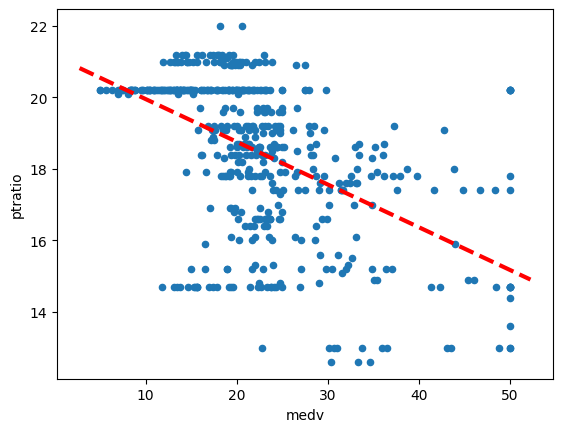

In [17]:
medv_ols = ols_fun('medv', 'medv_model')[2]
# abline function from ISLP
def abline(ax, b, m, *args, **kwargs):
  "Add a line with slope m and intercept b to ax"
  xlim = ax.get_xlim()
  ylim = [m * xlim[0] + b, m * xlim[1] + b]
  ax.plot(xlim, ylim, *args, **kwargs)

ax = Boston.plot.scatter('medv', 'ptratio')
abline(ax, medv_ols.params[0], medv_ols.params[1],
       'r--', linewidth = 3)

In [18]:
# residual plot code taken from ISLP
def resid_plot(results):

  ax = subplots(figsize=(8,8))[1]
  ax.scatter(results.fittedvalues, results.resid)
  ax.set_xlabel('Fitted Value')
  ax.set_ylabel('Residual')
  ax.axhline(0, c='k', ls='--')


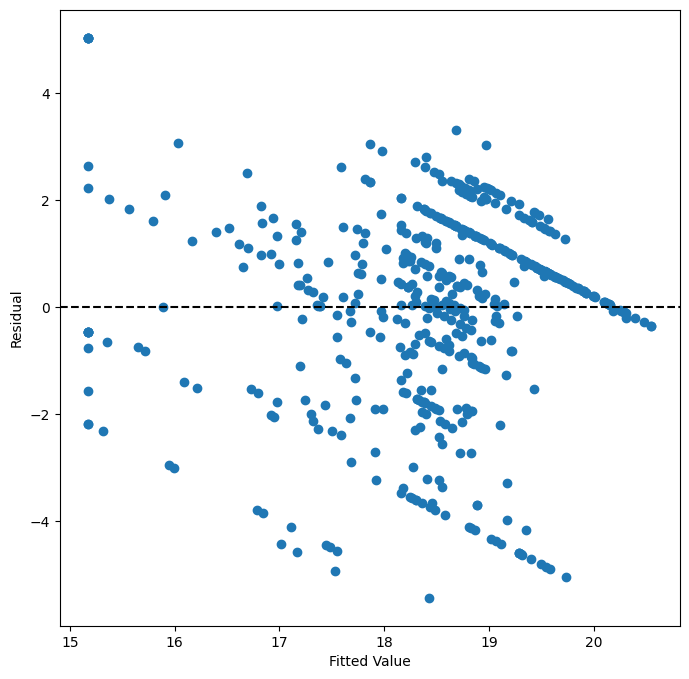

In [19]:
resid_plot(medv_ols)

While the r-squared value suggests that `medv` can account for substantial variation in `ptratio`, a further look into the residual plot for this model reveals concerns regarding assumptions of normality, equal variance and independence of errors (cite old textbook). For one,the residuals in this plot appear to follow a structured pattern and are not distributed randomly along the zero line, so a non-linear relationship between `ptratio` and `medv` may be possible. Additionally, the spread of residuals becomes increasingly concentrated at higher fitted values, and this non-constant variance can lead to incorrect standard errors which consequently invalidate the p-values and conclusions taken from this model. Finally, the apparent diagonal lines in this residual plot represent correlation between residuals, indicating that this model is missing some underlying patterns in the data (thus high biased) and will not generalize well to new information.

(I used ChatGPT to help me understand concepts related to OLS assumptions of normality, equal variance and independence of errors as they apply to interpreting residual plots)

<ipython-input-21-60a368253ebd>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, rad_ols.params[0], rad_ols.params[1],


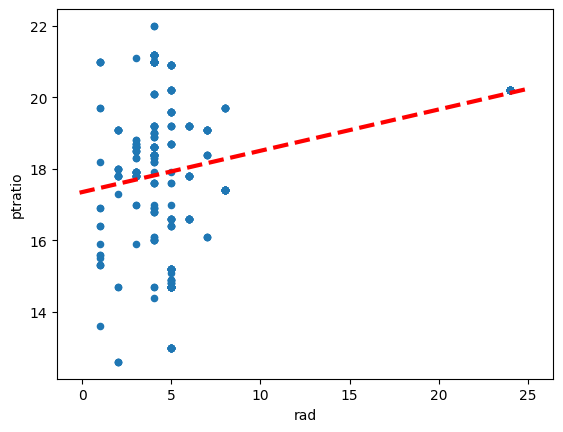

In [21]:
# repeat with rad variable
ax = Boston.plot.scatter('rad', 'ptratio')
abline(ax, rad_ols.params[0], rad_ols.params[1],
       'r--', linewidth = 3)

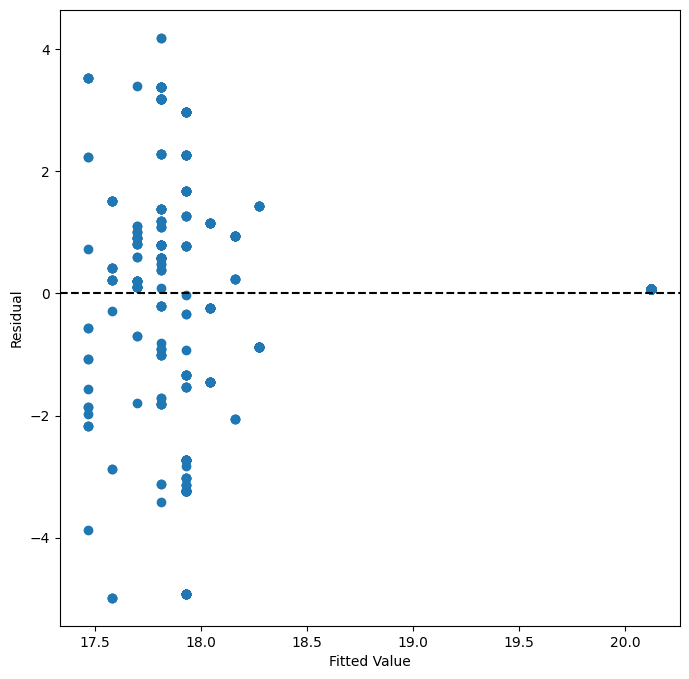

In [22]:
resid_plot(rad_ols)

There seems to be one extreme point at `rad` ~ 25, which could be a high-leverage point that pulls the overall regression line upwards. Because of this extreme point, most of the values are clustered to the left in the residual plot with one value on the right. Other than this extreme point, the spread of residuals to be relatively randomly scattered and thus suited to an OLS model, however it is necessary to check on the potential high-leverage point as it may exert disproportionate influence on model estimates.

Text(0, 0.5, 'leverage')

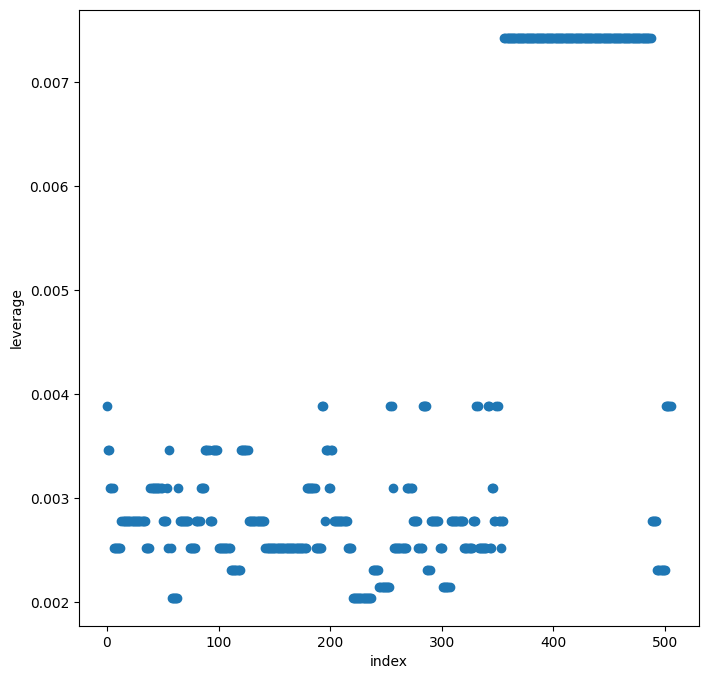

In [23]:
infl = rad_ols.get_influence()
shapex = MS(['rad']).fit_transform(Boston)
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(shapex.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('index')
ax.set_ylabel('leverage')


In [24]:
np.argmax(infl.hat_matrix_diag)

356

In [25]:
infl.hat_matrix_diag[356]

0.007430307892963924

In [26]:
n = Boston.shape[0]
2/n

0.003952569169960474

The maximal leverage of 0.007 does not significantly exceed the threshold set at 0.004, so it seems like the extreme value may not actually be a leverage point.

#### Multivariate Models

##### Regressing `ptratio` on `medv`, `nox`, `rad`, `zn`, and `indus`

In [33]:
multi1_model, multi1_coef, multi1_ols = ols_fun('medv',
                                                'nox', 'rad', 'zn',
                                                'indus',
                                                ind_val = 'multi1_model')


In [34]:
multi1_coef

,coef,std err,t,P>|t|
intercept,24.6197,0.534,46.078,0.0
medv,-0.0866,0.009,-9.822,0.0
nox,-0.1020,0.010,-10.214,0.0
rad,0.1115,0.011,10.585,0.0
zn,-0.0275,0.004,-7.544,0.0
indus,0.0624,0.017,3.633,0.0


As expected by the forward/backward selection, all coefficients included in this multivariate model are statistically significant. A one-unit increase in `medv`, `nox`, and `zn` is associated with lower pupil-teacher ratio while a one-unit increase in `rad` and `indus` is associated with a higher pupil-teacher ratio. Specifically, when comparing two neighborhoods that are equal on every other front excluding median house value, the one with a $1000 greater median house value has a 0.09 unit lower student-teacher ratio. A similar logic applies when interpreting the coefficients of each other variable in this model. Interestingly, while there is a substantial drop in the magnitude of the `medv` coefficient between the bivariate and multivariate model, there is only a slight decrease in the magnitude of the `rad` variable, indicating that some of the variation attributed to `medv` originally was actually due to other variables as suggested by the correlation of residuals in the residual plot.

In [35]:
multi1_model

,RSS,R2,R2_adj,aic,RSE,df_resid
multi1_model,1222.265046,0.483607,0.478443,1894.219513,1.563499,500.0


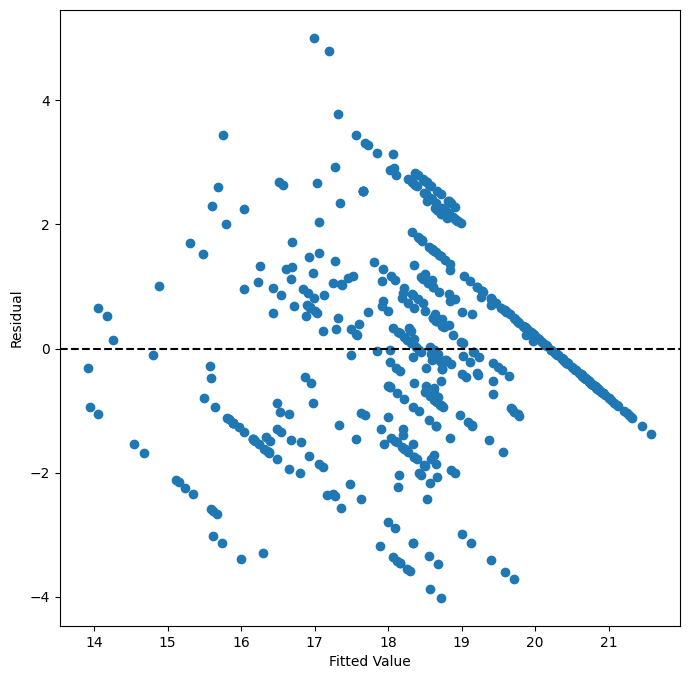

In [36]:
resid_plot(multi1_ols)

While the inclusion of more variables seems to increase the predictive power of this model (as suggested by the higher r-squared value), there is still reason for concern regarding the validity of this OLS model as residuals are non-randomly distributed along the zero line. This could indicate that this OLS model is still missing interaction or polynomial terms and thus will suffer from high bias and unreliable predictions.

##### Removing the `indus` variable from multivariate model

In [39]:
# correlation table showing high correlation between indus and nox
Boston.corr(numeric_only = True)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


While I initially wanted to remove `rad` from the multivariate model due to its high VIF score, a correlation matrix showed a high correlation between variables `nox` and `indus` that could have introduced the problem of collinearity to the original multivariate model. Thus, the model is run again with the exclusion of the variable `indus`.

In [41]:
multi2_model, multi2_coef, multi2_ols = ols_fun('medv',
                                                'nox',
                                                'zn',
                                                'rad',
                                                ind_val = 'multi2_model')

In [42]:
multi2_coef

,coef,std err,t,P>|t|
intercept,24.3648,0.536,45.450,0.0
medv,-0.0930,0.009,-10.641,0.0
nox,-0.0832,0.009,-9.626,0.0
zn,-0.0305,0.004,-8.498,0.0
rad,0.1203,0.010,11.595,0.0


While all predictors are still statistically significant, the removal of `indus` led to an increase in the magnitudes of the `medv`, `rad`, and `zn` coefficients, suggesting that they had originally shared predictive power with `indus`. This makes sense as a greater proportion of industrial and commerical zones likely limit residential development and the housing market due to zoning restrictions and undesirable factors such as noise, water and air pollution while also being approximate to major transportation routes as seen in the positive correlation between `indus` and `rad`. Residential, suburbian areas in turn may have greater school supplies while urban and industrial neighborhoods are likely strained for educational resources as reflected in high pupil-teacher ratios.

Interestingly, the magnitude of the `nox` estimate decreased upon the removal of `indus`, suggesting an initial overlap of information provided by these two highly correlated variables. Thus, multicollinearity may have inflated the model's estimates of `nox`'s contributions to predicting `ptratio`.  

In [43]:
multi2_model

,RSS,R2,R2_adj,aic,RSE,df_resid
multi2_model,1254.529356,0.469976,0.465744,1905.403219,1.582419,501.0


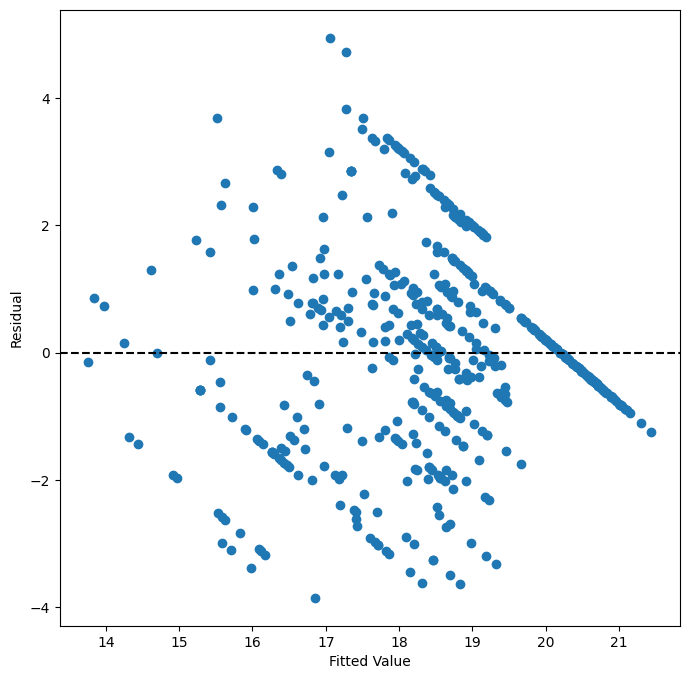

In [44]:
resid_plot(multi2_ols)

Like with the first multivariate model, there is reason to suspect non-linearity due to the structured patterns and heteroscedasticity present in the residual model.

In [45]:
mult_joined = pd.concat([multi1_model, multi2_model])
mult_joined

,RSS,R2,R2_adj,aic,RSE,df_resid
multi1_model,1222.265046,0.483607,0.478443,1894.219513,1.563499,500.0
multi2_model,1254.529356,0.469976,0.465744,1905.403219,1.582419,501.0


The second multivariate model without `indus` has overall worse predictive performance when compared to the first one, albeit to a very slight margin. Because much of the information provided by `indus` was shared with other correlated variables, its inclusion/exclusion does not result in drastic changes to model estimates or performance. For example, predictions of `ptratio` deviate by 1.56 units compared to 1.58 units on average for the models with and without the `indus` ratio, representing a small 0.02 unit loss in accuracy. Because the second model addresses the threat of multicollinearity through removing `indus` while only suffering a slight drop in accuracy, I may prefer it over the first model due to the bias-variance tradeoff present in many machine learning applications.

In [53]:
all_joined = pd.concat([bi_combined, mult_joined])
all_joined

,RSS,R2,R2_adj,aic,RSE,df_resid
medv_model,1756.623081,0.257847,0.256375,2069.739403,1.866913,504.0
rad_model,1855.709744,0.215984,0.214429,2097.505633,1.918844,504.0
multi1_model,1222.265046,0.483607,0.478443,1894.219513,1.563499,500.0
multi2_model,1254.529356,0.469976,0.465744,1905.403219,1.582419,501.0


Looking at the performance of these models from a broader perspective offers further insights into whether these models are actually useful for prediction. Bivariate models like the ones estimated for `rad` and `medv` seem to be too simplistic to meaningfully explain any trends in `ptratio` as seen in the small r-squared values at 0.22 and 0.26 respectively. On the other hand, while the multivariate models perform better overall on measures of model accuracy and goodness of fit compared to bivariate models, there is always the possibility of overfitting that captures random noise in addition to actual patterns in the data. (Chapter 3 of ISLP does not go over train/test procedures for the OLS models, thus it was left out of this analysis). Train-test splits or cross validation as introduced in later chapters of ISLP will help assess the real-world generalizability of the multivariate models in addition to the low bias (high accuracy) seen initially.  

The residual plots for each of the four models present further concerns for potential application in predictive tasks, as, albeit to different degrees, all plots show evidence of violating some assumptions of normality, equal variance and/or independence of errors and may thus produce biased estimates when applied to new data. Using non-linear regression methods such as Poisson regression (since `ptratio` is in fixed population units and is non-negative) or performing non-linear transformations (polynomial transformations) can help strengthen the predictive power of these regression models.

In [ ]:
# polynomial transformation here

In [ ]:
# train test split here

In [ ]:
# poisson regression here



---



## Exercise 3: Logistic Regression

Using the Boston data set, fit a classification model to predict whether a given suburb has a
crime rate above or below the median. Use logistic regression (we’ll save the other methods
for later). Try various subsets of the predictors. Describe and explain your methodology and
findings.

### Importing Libraries

In [54]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import itertools

### Preprocessing

Transforming continuous variable `crim` into a binary variable indicating whether a neighborhood has a crime rate above or below the median.

In [107]:
Boston = load_data('Boston')
Boston['nox'] = Boston['nox']*100
y = Boston.crim > Boston['crim'].median()
Boston['crim'] = y

### Preliminary Exploration

Correlation matrix of all variables in Boston

In [108]:
Boston.corr(numeric_only = True)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.436151,0.603260,0.070097,0.723235,-0.156372,0.613940,-0.616342,0.619786,0.608741,0.253568,0.453263,-0.263017
zn,-0.436151,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.603260,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,0.070097,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.723235,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.156372,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.613940,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.616342,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.619786,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.608741,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


Based on this correlation matrix alone, variables `nox`, `age`, `dis`, `rad`, `tax`, and `indus` seem to share a correlation with `crim`. A first logistic regression model will be fit on this subset of predictors.

In [115]:
def log_reg(*args, train_test = False):

  X = MS([*args]).fit_transform(Boston)
  if train_test==True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    glm_train = sm.GLM(y_train, X_train, family = sm.families.Binomial())
    results = glm_train.fit()
    results_sum = results.summary()
    probs = results.predict(exog = X_test)
    labels = np.array([False]*len(X_test))
    labels[probs>0.5]=True
    results_ct = confusion_table(labels, y_test)
    acc_rate = np.mean(labels == y_test)
  else:
    glm = sm.GLM(y, X, family = sm.families.Binomial())
    results = glm.fit()
    results_sum = results.summary()
    probs = results.predict()
    labels = np.array([False]*506)
    labels[probs>0.5]=True
    results_ct = confusion_table(labels, Boston.crim)
    acc_rate = np.mean(labels == Boston.crim)

  return results_sum, results_ct, acc_rate

def further_acc(ct):
  overall_acc = (ct.loc[True, True] + ct.loc[False, False])/(ct.sum().sum())
  pos_acc = ct.loc[True, True]/ct.loc[True].sum()
  neg_acc = ct.loc[False, False]/ct.loc[False].sum()
  return overall_acc, pos_acc, neg_acc

### Fitting model

First, I attempt a classifcation model using this subset of variables on the entire Boston dataset.

In [72]:
og_model, og_ct, og_acc = log_reg('nox', 'age', 'dis', 'rad', 'tax', 'indus')

In [116]:
og_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   crim   No. Observations:                  506
Model:                            GLM   Df Residuals:                      499
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -122.38
Date:                Wed, 12 Feb 2025   Deviance:                       244.77
Time:                        23:52:39   Pearson chi2:                     294.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5945
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -24.5072      3.744     -6.545      0.000     -31.846     -17.168
nox           42.0938      6.919      6.084      0.000      28.533      55.655
age            0.0138      0.009      1.582      0.114      -0.003       0.031
dis            0.2061      0.146      1.411      0.158      -0.080       0.492
rad            0.5982      0.116      5.159      0.000       0.371       0.825
tax           -0.0073      0.002     -3.072      0.002      -0.012      -0.003
indus         -0.0576      0.042     -1.360      0.174      -0.141       0.025
==============================================================================
"""

Variables `indus`, `dis`, and `age` seem to not be statistically significant predictors of `crim` classification. However, since the goal of this model is prediction, we are more concerned with the performance and accuracy of the overall model regardless of individual estimates.

 While coefficients in logistic regression do not allow for the intuitive interpretation that can be done in OLS models, we can broadly understand the direction of the relationship between each variable and a neighborhood's crime rates, even before the model is applied for prediction. For instance, nitrogen oxide concentration (`nox`) and radial highway accessability (`rad`) are significantly positively correlated with the likelihood that a neighborhood has an above-average crime rate, while full-value property-tax rate per $10,000 (`tax`) is negatively correlated with the likelihood of a neighborhood having an above-average crime rate.

In [101]:
og_ct

Truth,False,True
Predicted,,
False,225,40
True,28,213


In [75]:
og_acc

0.8656126482213439

This logistic regression model classifies neighborhoods based on crime rate at a 87% accuracy rate. Still, we are more interested in how our model performs when predicting values of new, unseen data.

### Testing initial model

In [76]:
tt_model, tt_ct, tt_acc = log_reg('nox', 'age', 'dis', 'rad', 'tax', 'indus',
                                  train_test = True)

In [77]:
tt_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   crim   No. Observations:                  379
Model:                            GLM   Df Residuals:                      372
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -89.798
Date:                Wed, 12 Feb 2025   Deviance:                       179.60
Time:                        23:53:40   Pearson chi2:                     241.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5984
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -26.4100      4.676     -5.648      0.000     -35.575     -17.245
nox           45.2084      8.757      5.162      0.000      28.044      62.372
age            0.0119      0.010      1.149      0.251      -0.008       0.032
dis            0.2604      0.175      1.489      0.137      -0.082       0.603
rad            0.6446      0.136      4.725      0.000       0.377       0.912
tax           -0.0074      0.003     -2.650      0.008      -0.013      -0.002
indus         -0.0583      0.050     -1.164      0.244      -0.157       0.040
==============================================================================
"""

In [78]:
tt_ct

Truth,False,True
Predicted,,
False,57,13
True,9,48


In [103]:
overall, pos, neg = further_acc(tt_ct)
print(f"Overall accuracy rate: {overall}\nPositive accuracy rate: {pos}\nNegative accuracy rate: {neg}")

Overall accuracy rate: 0.8267716535433071
Positive accuracy rate: 0.8421052631578947
Negative accuracy rate: 0.8142857142857143


The test accuracy for this model is 83%, around a 4 percentage point drop from the training accuracy. When the logistic regression model classifies a neighborhood as having an above-average crime rate, it has a 84% accuracy rate, but predictions for neighborhoods below the average for crime rates have a lower accuracy rate of 81%. While this is an acceptable accuracy rate, we may be able to refine this model further by removing variables like `age`, `dis`, and `indus` that do not seem to contribute significantly to model estimates.

### Refining model by removing redundencies

In [80]:
ref_model, ref_ct, ref_acc = log_reg('nox', 'rad', 'tax', train_test = True)

In [81]:
ref_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   crim   No. Observations:                  379
Model:                            GLM   Df Residuals:                      375
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -92.030
Date:                Wed, 12 Feb 2025   Deviance:                       184.06
Time:                        23:54:56   Pearson chi2:                     207.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5936
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -20.7306      2.722     -7.617      0.000     -26.065     -15.396
nox           36.7362      5.101      7.201      0.000      26.738      46.734
rad            0.6765      0.131      5.150      0.000       0.419       0.934
tax           -0.0077      0.003     -2.963      0.003      -0.013      -0.003
==============================================================================
"""

All coefficients continue to be statistically significant and retain the same direction relationship with `crim`.

In [82]:
ref_ct

Truth,False,True
Predicted,,
False,61,13
True,5,48


In [104]:
overall, pos, neg = further_acc(ref_ct)
print(f"Overall accuracy rate: {overall}\nPositive accuracy rate: {pos}\nNegative accuracy rate: {neg}")

Overall accuracy rate: 0.8582677165354331
Positive accuracy rate: 0.9056603773584906
Negative accuracy rate: 0.8243243243243243


The test accuracy of this refined model is substantially better than the initial model at 86% compared to 83%. Similar to the first test trial, the model is more accurate when classifying neighborhoods above the average crime rate compared to those below the average. The model classifies neighborhoods with an above-average crime rate at a 91% accuracy rate compared to only 82% for those with below-average crime rates. In technical terms, it seems like this model is more subject to type 1 errors as it falsely classifies neighborhoods with below average crime rates as having above-average crime rates.

### Final exploration of different subset combinations

Even though I am relatively satisfied with the predictive performance of the refined model, I am interested in exploring changes in model accuracy when different combinations of variables are used to make predictions.

In [122]:
X2 = ['rad', 'nox', 'tax', 'indus', 'age', 'dis']
best_model = None
best_score = 0
accuracy_scores = {}
for i in range(1, len(X2)+1):
  for combo in itertools.combinations(X2, i):
    X2_list = list(combo)
    X2_features = MS(X2_list).fit_transform(Boston)
    X_train, X_test, y_train, y_test = train_test_split(X2_features, y, random_state = 42)
    glm_train = sm.GLM(y_train, X_train, family = sm.families.Binomial())
    results = glm_train.fit()
    probs = results.predict(exog = X_test)
    labels = np.array([False]*len(X_test))
    labels[probs>0.5]=True
    acc_score = np.mean(labels == y_test)
    accuracy_scores[str(combo)]=  acc_score
    # used stack exchange
acc_df = pd.DataFrame.from_dict(accuracy_scores, orient='index')


In [125]:
acc_df.loc[acc_df.idxmax()]

,0
"('nox', 'tax', 'indus')",0.889764


According to this iteration through conbinations, the combination of variables `nox`, `tax`, and `indus` seems to result in the highest overall test accuracy rate. The details of the model based on these combinations is explored further.

In [126]:
final_model, final_ct, final_acc = log_reg('nox', 'tax',
                                           'indus', train_test = True)


In [127]:
final_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   crim   No. Observations:                  379
Model:                            GLM   Df Residuals:                      375
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -113.58
Date:                Thu, 13 Feb 2025   Deviance:                       227.16
Time:                        00:27:31   Pearson chi2:                     259.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5447
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -18.6044      2.408     -7.727      0.000     -23.323     -13.885
nox            0.3428      0.052      6.622      0.000       0.241       0.444
tax            0.0035      0.002      2.224      0.026       0.000       0.007
indus         -0.1044      0.043     -2.429      0.015      -0.189      -0.020
==============================================================================
"""

All variables, even `indus` which initially had a non-significant p-value, now share statistically significant relationships with `crim`. Interestingly, the direction of the relationship between `tax` and `crim` is now slightly positive.

In [128]:
final_ct

Truth,False,True
Predicted,,
False,59,7
True,7,54


In [130]:
overall, pos, neg = further_acc(final_ct)
print(f"Overall accuracy rate: {overall}\nPositive accuracy rate: {pos}\nNegative accuracy rate: {neg}")

Overall accuracy rate: 0.889763779527559
Positive accuracy rate: 0.8852459016393442
Negative accuracy rate: 0.8939393939393939


This is the highest test accuracy rate obtained yet overall and for neighborhoods both above and below the median crime rate. Interestingly, the model's predictions are slightly more accurate for neighborhoods with below average crime rates (89.3%) compared to those with above average crime rates (88.5%) in contrast to the results obtained with the past two models.

While further cross validation of this model would be beneficial before basing decisions on its estimates, as of now, it seems like the subset of `indus`, `nox`, and `tax` variables perform optimally in classifying Boston neighborhoods based on their crime rates.



---



## References

https://stackoverflow.com/questions/49779515/create-a-dataframe-from-dictionary-and-both-key-and-value-are-rows


Other textbook

https://wandb.ai/mostafaibrahim17/ml-articles/reports/Feature-selection-in-machine-learning--Vmlldzo3NjIzNzQ1

https://github.com/intro-stat-learning/ISLP/blob/main/docs/source/datasets/Boston.ipynb